
### **Q1. How does bagging reduce overfitting in decision trees?**

**Bagging** (Bootstrap Aggregating) reduces overfitting in decision trees by creating multiple versions of the training dataset using **random sampling with replacement**, and then training a separate decision tree on each version. The predictions from all trees are **aggregated (usually by majority voting or averaging)** to make the final prediction.

### **Why this helps reduce overfitting:**

* **Decision trees are high-variance models**, meaning they can fit the training data very closely and may not generalize well to unseen data.
* Bagging reduces variance by **averaging out the errors** from individual trees. Since each tree is trained on a different subset of data, their errors are less likely to be correlated.
* The ensemble is **more stable and generalizes better**, even if individual trees overfit their subsets.

### **Analogy**:

Think of it like asking multiple experts (each with partial knowledge) for a decision and then taking a vote — the group decision is usually better than one expert alone.

### **In practice**:

The **Random Forest algorithm** is a perfect example of bagging applied to decision trees, with additional randomness introduced by selecting random features at each split.




In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print("Accuracy of Decision Tree:", acc_dt)
print("Accuracy of Random Forest:", acc_rf)


Accuracy of Decision Tree: 0.9415204678362573
Accuracy of Random Forest: 0.9707602339181286


### ✅ Summary

> Bagging reduces overfitting in decision trees by training multiple trees on different subsets of the data and combining their predictions. This helps smooth out the individual overfitting tendencies of single trees. Random Forest is a classic example where this ensemble approach leads to better generalization.




### **Q2. What are the advantages and disadvantages of using different types of base learners in bagging?**

In **bagging**, the most common base learner is a **decision tree**, but in theory, you can use **any type of model**. The choice of base learner affects the performance and behavior of the ensemble.

---

### ✅ **Advantages of using different types of base learners in bagging:**

1. **Flexibility**:

   * Bagging can be applied to many algorithms (e.g., decision trees, KNN, SVM).
   * You can choose models based on the nature of your data (e.g., trees for categorical features, KNN for spatial data).

2. **Reduced Overfitting for High-Variance Models**:

   * Works best with **unstable** models like decision trees, which benefit most from variance reduction.

3. **Model Diversity (if you mix types)**:

   * Using different learners can increase diversity in predictions, which sometimes improves performance.

---

### ❌ **Disadvantages of using different types of base learners:**

1. **Ineffective with Low-Variance Models**:

   * Stable models (like linear regression or SVM) don't benefit much from bagging since they don’t vary much across samples.

2. **Complexity & Interpretability**:

   * Using mixed or non-tree models makes the ensemble harder to interpret and manage.

3. **Increased Computational Cost**:

   * Some models (like SVM or neural networks) are computationally expensive, especially when training many versions.

4. **Lack of Built-in Support**:

   * Libraries like `RandomForest` are optimized for decision trees; using other models requires manual implementation of bagging (e.g., using `BaggingClassifier` from `sklearn.ensemble`).

---

### ✅ Best Practice:

> Use **high-variance models** like **decision trees** with bagging. If you want to experiment with other learners, use `BaggingClassifier` from `scikit-learn`.

---



In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base model: KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Bagging with KNN
bagging_knn = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)

# Predictions
y_pred = bagging_knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging with KNN:", acc)


Accuracy of Bagging with KNN: 0.9532163742690059



### 🧠 Key Notes:

* `BaggingClassifier` wraps around any estimator you pass to `base_estimator`.
* KNN is a **low-variance, high-bias model**, so bagging may not improve it as much as with decision trees.
* Try changing the base estimator or number of estimators to see performance differences.




### **Q3. How does the choice of base learner affect the bias-variance tradeoff in bagging?**

The **bias-variance tradeoff** is a key concept in machine learning:

* **Bias**: Error due to wrong assumptions in the model (underfitting).
* **Variance**: Error due to model sensitivity to small fluctuations in the training set (overfitting).

Bagging helps primarily by **reducing variance** — but how much it helps depends on the base learner.

---

### ✅ **Effect of Base Learner on Bias-Variance in Bagging:**

| Base Learner            | Bias      | Variance      | Bagging Impact                               |
| ----------------------- | --------- | ------------- | -------------------------------------------- |
| **Decision Tree**       | Low bias  | High variance | ✅ Big improvement (ideal for bagging)        |
| **KNN (k=1)**           | Low bias  | High variance | ✅ Works well                                 |
| **SVM / Linear Models** | High bias | Low variance  | ❌ Limited impact (little variance to reduce) |

---

### ✅ Summary:

* **High-variance learners (like decision trees)** benefit the most from bagging because bagging **reduces variance without increasing bias**.
* **Low-variance, high-bias learners (like SVM or linear regression)** don’t gain much from bagging, and it may even hurt performance due to added complexity without reducing error significantly.

---

### 🧠 Example:

* A single decision tree might overfit (low bias, high variance).
* Bagging averages out the overfitting across multiple trees → **lower variance, similar bias** → better performance.

---

### 🔎 Rule of Thumb:

> **Use bagging when your base learner is prone to overfitting (high variance).** Otherwise, it might not help much.




### **Q4. Can bagging be used for both classification and regression tasks? How does it differ in each case?**

Yes, **bagging can be used for both classification and regression tasks**. The **core idea remains the same**: train multiple models on different bootstrapped subsets of the data and **combine their outputs**. However, the **way outputs are aggregated differs** between classification and regression.

---

### ✅ **Bagging in Classification:**

* **Goal**: Predict class labels (e.g., `cat`, `dog`).
* **Ensemble Output**: **Majority voting** (most common prediction across all models).
* **Example Algorithm**: `RandomForestClassifier` in `scikit-learn`.

**How it helps**:

* Reduces variance from unstable classifiers like decision trees.
* Makes the final model more robust and less likely to overfit.

---

### ✅ **Bagging in Regression:**

* **Goal**: Predict continuous values (e.g., `price`, `temperature`).
* **Ensemble Output**: **Averaging** (mean of all model predictions).
* **Example Algorithm**: `RandomForestRegressor` or `BaggingRegressor`.

**How it helps**:

* Smooths out fluctuations in predictions by averaging them.
* Reduces variance, especially for models like regression trees.

---

In [18]:
### 🔍 Example in scikit-learn:

#### Classification:


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model = BaggingClassifier(estimator=DecisionTreeClassifier())

In [22]:
#### Regression:


from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
model = BaggingRegressor(estimator=DecisionTreeRegressor())


### ✅ Summary:

> Bagging can be applied to both classification and regression. The only difference is how predictions are combined — **voting for classification**, and **averaging for regression**.





---

### **Q5. What is the role of ensemble size in bagging? How many models should be included in the ensemble?**

### ✅ **Role of Ensemble Size (`n_estimators`) in Bagging:**

The **ensemble size** refers to the number of base models (learners) trained on different bootstrapped subsets. It's a critical factor in the **performance and stability** of a bagging ensemble.

---

### 🔄 **Impact of Ensemble Size:**

| Ensemble Size               | Effect                                                                                                           |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Too Small (e.g., <10)**   | May not reduce variance effectively. The ensemble behaves almost like a single model.                            |
| **Moderate (e.g., 30–100)** | Usually enough for a significant variance reduction and stable predictions.                                      |
| **Very Large (e.g., >200)** | May slightly improve performance, but **diminishing returns**. Increased **training time** and **memory usage**. |

---

### 🧠 Key Points:

* **More estimators = lower variance**, up to a point.
* After a certain size, adding more models **doesn’t significantly improve accuracy**, but increases computation.
* Ideal size depends on:

  * Dataset size and complexity.
  * Variance of the base model.
  * Computational constraints.

---

### 🛠️ Rule of Thumb:

> Start with **50 to 100 estimators**, then increase if needed and observe model performance (e.g., with cross-validation).

---

### 📈 Tip:

You can plot accuracy vs. number of estimators to find the sweet spot:

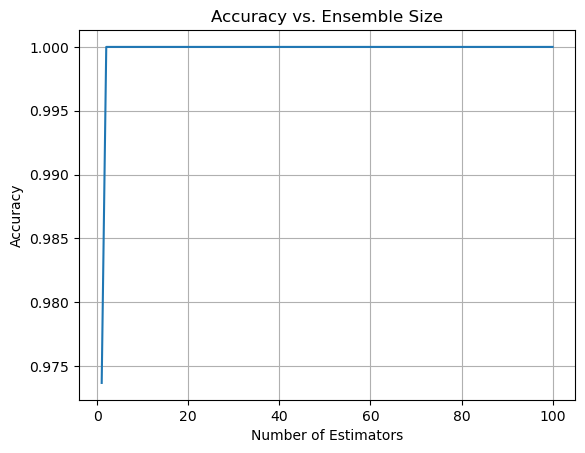

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scores = []
for n in range(1, 101):
    model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.plot(range(1, 101), scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Ensemble Size")
plt.grid(True)
plt.show()

---

### ✅ Summary for Assignment:

> The ensemble size in bagging directly affects its ability to reduce variance. While more models generally improve stability, the benefit levels off after a certain point. A typical range is 50–100 estimators, balancing performance and efficiency.



### **Q6. Can you provide an example of a real-world application of bagging in machine learning?**

### ✅ **Real-World Applications of Bagging (Random Forest):**

1. **Healthcare: Predicting Disease Outcomes**

   * **Problem**: Predicting the likelihood of diseases such as diabetes, cancer, or heart disease based on medical data.
   * **How Bagging Helps**: Bagging (especially Random Forest) works well here because medical datasets often have many variables and potential noise. The ensemble approach helps **reduce variance** while maintaining **model accuracy**, making it more reliable for predicting diseases from medical features (e.g., age, blood pressure, cholesterol levels).
   * **Example**: Using a Random Forest to predict breast cancer malignancy using features like tumor size, shape, and texture from imaging data.

2. **Finance: Credit Scoring and Fraud Detection**

   * **Problem**: Predicting whether an individual will default on a loan or detecting fraudulent financial transactions.
   * **How Bagging Helps**: Bagging can handle noisy and unbalanced data, as it creates multiple models based on different subsets of data. For instance, if the data contains features like income, transaction history, and spending habits, bagging helps in handling variability and improving the model’s prediction of creditworthiness or fraud risk.
   * **Example**: Random Forest is commonly used for detecting fraudulent credit card transactions by looking for unusual patterns in user behavior and spending.

3. **Retail: Customer Segmentation and Sales Prediction**

   * **Problem**: Predicting future sales or customer churn based on historical data.
   * **How Bagging Helps**: In retail, large amounts of data are often available regarding customer behaviors (e.g., purchases, website visits, and demographic details). Bagging models like Random Forests can be used to predict which customers are likely to churn or which products are likely to sell well in the next quarter. This helps businesses make **data-driven marketing** and **inventory management decisions**.
   * **Example**: Random Forest can predict sales for each product category based on customer demographics, seasonality, promotions, and historical purchase patterns.

4. **Image Classification: Object Detection**

   * **Problem**: Classifying images or detecting objects within images (e.g., detecting cars, faces, etc.).
   * **How Bagging Helps**: In computer vision, decision trees can be unstable due to the complexity of visual data. Bagging, especially with decision trees, can be used to build robust models that classify images more accurately, improving object detection algorithms.
   * **Example**: Using a Random Forest to identify cars in satellite imagery or classify objects in a photo for autonomous driving applications.

5. **Natural Language Processing (NLP): Text Classification**

   * **Problem**: Classifying text data into categories such as spam vs. non-spam, sentiment analysis, or topic classification.
   * **How Bagging Helps**: In text classification, individual models like decision trees may struggle to capture the complex patterns in textual data. Bagging helps by aggregating multiple models' predictions, thus improving accuracy and reducing overfitting on noisy or limited datasets.
   * **Example**: A Random Forest can be used to classify emails as spam or non-spam by learning from features such as word frequency, sentence structure, and presence of certain keywords.

---

### ✅ **Why Bagging Works Well in These Applications:**

* **Reduces Overfitting**: Bagging helps prevent overfitting by averaging the predictions of multiple models, making the overall model more generalizable to unseen data.
* **Improves Robustness**: By training multiple models on different subsets of data, bagging reduces the sensitivity to noise and outliers, which is particularly useful in real-world data that is often noisy or incomplete.
* **Handles Large, Complex Datasets**: Bagging can work with high-dimensional data (like images or text) and large datasets without much performance loss.

---

### 🧠 Example: Random Forest in Healthcare

In the healthcare industry, a **Random Forest** model could be used to predict whether a patient will develop diabetes based on several features like:

* **Age**
* **BMI (Body Mass Index)**
* **Family history of diabetes**
* **Blood sugar levels**

The ensemble of decision trees helps to reduce the model's variance, leading to better predictions, especially in situations where patient data may have missing or noisy values.

---

### ✅ **Summary 

> Bagging, specifically with Random Forest, has broad applications in real-world domains like **healthcare**, **finance**, **retail**, **image classification**, and **text classification**. It improves the accuracy, stability, and generalization of models, making it ideal for handling complex, noisy, and high-dimensional data.





### **Real-World Application of Bagging in Machine Learning**

One of the most prominent **real-world applications** of **bagging** is in **healthcare**, particularly in predicting disease outcomes and aiding in diagnostic decisions.

#### **Healthcare: Predicting Disease Outcomes**

* **Problem**: Predicting the likelihood of diseases such as **diabetes**, **cancer**, or **heart disease** based on medical data is a critical and common task in healthcare. These predictions help doctors make informed decisions about treatment and early interventions.

* **Why Bagging Works**:

  * **High Variance in Medical Data**: Medical datasets often contain a large number of features (e.g., age, medical history, test results), some of which may have noisy or incomplete data. Bagging, particularly with **Random Forest**, helps reduce the **variance** in the model's predictions.
  * **Handling Overfitting**: A single decision tree can easily overfit to noisy or limited training data. However, bagging, by averaging the predictions of multiple trees, significantly **reduces overfitting** and provides more **stable predictions**.

* **How It Works**:

  * Multiple **decision trees** are trained on different **bootstrapped subsets** of the data. Each tree makes a prediction based on the features in its subset.
  * For **classification tasks** (e.g., predicting whether a patient will develop a disease), the output of each tree is combined using **majority voting**.
  * For **regression tasks** (e.g., predicting the time to relapse or recovery), the outputs are averaged.

* **Example**: One example of a bagging application in healthcare is predicting **breast cancer** outcomes. A **Random Forest classifier** can be trained using features such as tumor size, shape, texture, and other medical metrics. The individual trees in the forest vote on whether the tumor is benign or malignant, and the final decision is made based on the majority of votes.

* **Benefits**:

  * **Improved Accuracy**: Bagging's ability to reduce variance leads to better generalization, even when the training data has noise or outliers.
  * **Robustness**: Bagging helps handle missing or incomplete data in medical datasets, which is very common in real-world healthcare scenarios.

---

#### **Other Applications of Bagging in Real-World Domains**:

1. **Finance: Credit Scoring and Fraud Detection**

   * **Problem**: Predicting whether an individual will default on a loan or detecting fraudulent transactions.
   * **How Bagging Helps**: Financial datasets are often unbalanced (e.g., more legitimate transactions than fraudulent ones). Bagging helps improve the model's stability and accuracy, even when the data is noisy or imbalanced.
   * **Example**: Random Forests can be used to identify fraudulent credit card transactions by learning from transaction history and spending patterns.

2. **Retail: Sales Forecasting and Customer Segmentation**

   * **Problem**: Retailers want to predict which products are likely to sell well and which customers are most likely to churn.
   * **How Bagging Helps**: Retail data often includes many different features, such as customer behavior, seasonality, and promotional campaigns. Bagging reduces variance, allowing for more accurate predictions of future sales or customer behavior.
   * **Example**: Random Forest can predict customer churn based on transactional data, improving customer retention strategies.

3. **Image Classification: Object Detection in Autonomous Vehicles**

   * **Problem**: Detecting and classifying objects (e.g., cars, pedestrians, traffic signs) in images or video streams.
   * **How Bagging Helps**: Bagging with decision trees helps improve the accuracy and robustness of image classification models. The model can be more stable, especially in scenarios where object detection needs to be highly reliable (e.g., autonomous driving).
   * **Example**: A Random Forest model could classify objects in images from a car’s dashboard camera, helping it detect obstacles in real time.

4. **Natural Language Processing (NLP): Sentiment Analysis**

   * **Problem**: Classifying text data (e.g., social media posts, product reviews) into categories such as positive or negative sentiment.
   * **How Bagging Helps**: Bagging reduces the variance of predictions, improving the model’s ability to generalize on unseen text data. It can handle noisy and unbalanced text data better than single models.
   * **Example**: Random Forests are used in sentiment analysis to classify social media posts or reviews as positive or negative, based on the words used and their frequencies.

---

### **Summary**

Bagging (and specifically Random Forest) has a wide range of **real-world applications** due to its ability to reduce model variance, handle noisy data, and improve accuracy. Some key examples include **healthcare**, **finance**, **retail**, **image classification**, and **text classification**. In each of these fields, bagging helps by creating more stable and accurate predictions, even when the underlying data is complex or incomplete.

> **In healthcare**, for instance, bagging improves predictions for disease outcomes, making it an invaluable tool for early diagnosis and treatment planning. In **finance**, it helps detect fraud and predict credit risk, while in **retail**, it forecasts sales and identifies customer trends.

Bagging provides the advantage of **ensemble learning**, where the combination of multiple models creates a more robust and reliable solution than a single model could offer.

